<h2>Implement my very simple NN in Nielsen's code - SR Nov21</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import network
net = network.Network([2,4,1])

We need 2 input neurons (x,y), four work horses and one output neuron. Let us visualise the random initial state of the network.

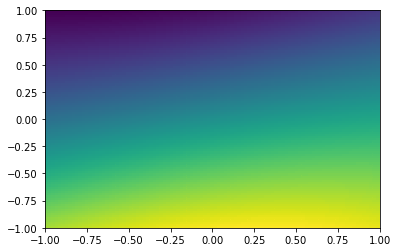

In [8]:
nbins=100
xi, yi = np.mgrid[-1:1:nbins*1j, -1:1:nbins*1j]
zi = net.feedforward(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()

In [9]:
net.biases,net.weights

([array([[-0.01197519],
         [-0.71337781],
         [-0.25443127],
         [ 0.10945697]]),
  array([[-1.04121722]])],
 [array([[-1.17455805,  0.38743398],
         [-0.88932324,  1.37735703],
         [-0.65356311,  1.1023507 ],
         [-0.75725071, -0.43668885]]),
  array([[-0.5291658 , -0.459854  , -0.61429909,  1.1973431 ]])])

Although the training data is expected as a list of tuples ([[x],[y]],[[sign]]), the feedforward routine itself wants [[x1,x2,x3],[y1,y2,y3]].

In [5]:
net.feedforward([[-.2,.2,.3],[.3,.3,.2]])

array([[0.77328812, 0.78629872, 0.78877581]])

In [13]:
# training = [];
# for d in range(0,100):
#     x=2*np.random.random()-1
#     y=2*np.random.random()-1
#     training.append((np.array([[x],[y]]),np.array([[1/2+np.sign(x*y)/2]])));

It is better to first define x and y as arrays of coordinates, this way I can also plot the points easily.

In [10]:
n = 100;
x = 2*np.random.random(n)-1
y = 2*np.random.random(n)-1
training = [];
for i in range(0,n):
    training.append((np.array([[x[i]],[y[i]]]),np.array([[1/2+np.sign(x[i]*y[i])/2]])));

In [11]:
training[:5]

[(array([[ 0.85289251],
         [-0.89910534]]),
  array([[0.]])),
 (array([[ 0.34793241],
         [-0.88003447]]),
  array([[0.]])),
 (array([[-0.03868564],
         [-0.96491298]]),
  array([[1.]])),
 (array([[-0.52811615],
         [-0.6174164 ]]),
  array([[1.]])),
 (array([[ 0.98624978],
         [-0.80781106]]),
  array([[0.]]))]

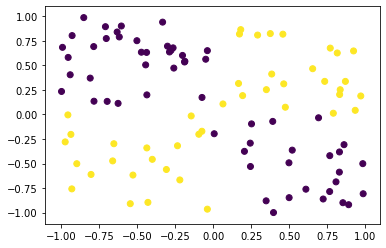

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c=np.sign(x*y))
plt.show()

Now, train the network. We need a surprisingly large number of epochs.

In [14]:
%%capture
net.SGD(training, 1000, 25, 3.0)

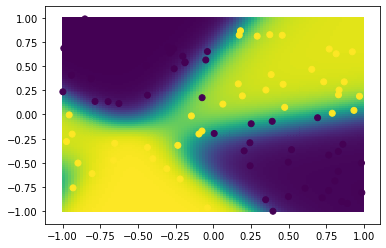

In [15]:
nbins=100
xi, yi = np.mgrid[-1:1:nbins*1j, -1:1:nbins*1j]
zi = net.feedforward(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.scatter(x,y,c=np.sign(x*y))
plt.show()